# Exam 1 Practical

### Instructions: replace 'YOUR CODE HERE' comments with your code as needed to achieve the results described below.  Add import statements as needed.
### There are three parts, which use different data sets and can be worked on separately.  Part 1 has 9 problems, part 2 has 8 problems, and part 3 has 6 problems.  All problems are worth the same number of points.

In [21]:
%matplotlib inline

In [22]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

## Part 1.  Data acquisition, preprocessing, and visualization

### read auto data set as a pandas data frame df

In [23]:
input_file = "https://raw.githubusercontent.com/grbruns/cst495/master/imports-abridged.csv"
df = pd.read_csv(input_file)

### save the attribute (feature) names in a numpy array

In [24]:
arr = np.asarray(list(df.columns.values))

### show summary info about dataframe df

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
num_of_doors         205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-null object
peak_rpm             205 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


### modify df to remove rows in which price is '?', and to convert price feature to int

In [26]:
for i in range(df.shape[0]):
    if (df.price[i] == "?"):
        df = df.drop([i])

### plot a histogram of the price values

D:\Programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Histogram of Price')

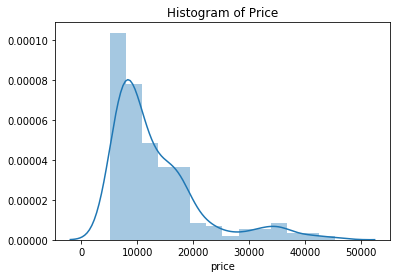

In [27]:
sns.distplot(df.price.astype(int))
plt.title('Histogram of Price')

### plot price by engine size as a scatterplot

In [28]:
sns.scatterplot(x = df.price.astype(int),y = df.engine_size.astype(int))
plt.title('Scatterplot of Price vs Engine Size')

AttributeError: module 'seaborn' has no attribute 'scatterplot'

### convert all '?' values in df to numpy NaN values

In [29]:
df = df.replace("?", "nan")

### replace the num_of_doors feature with one or more numeric features

In [30]:
df_door = pd.get_dummies(df.num_of_doors)
df = df.join(df_door)

### put all features but 'price' into dataframe X, and target variable 'price' in numpy array y

In [31]:
X = df
X = X.drop('price', 1)
y = np.asarray(df.price)

### Impute missing values of dataframe X (using the median value of the column), and scale.  The result should be a matrix X.  (You do not need to use a pipeline.)

In [32]:
X_mean = Imputer(missing_values=np.nan, strategy='mean')
X = X_mean.fit(X)

ValueError: could not convert string to float: 'four'

### verify that X and y are correct 

In [33]:
# DO NOT MODIFY code in this cell!

print(X.shape)
print(X[10:12, 10:12])

print(y.shape)
print(y[20])

print(np.count_nonzero(np.isnan(X)))

(201, 17)


TypeError: unhashable type: 'slice'

## Part 2.  Basic machine learning

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree

### Load the Scikit-Learn breast cancer data.  Store the 'data component as numpy matrix X, the 'target' component into numpy array y, and the 'feature names' component as numpy array 'features'.

In [41]:
breast_cancer = load_breast_cancer()
features = breast_cancer['feature_names']
X = breast_cancer['data']
y = breast_cancer['target']

### report the count of numpy NaN values in matrix X

In [42]:
np.isnan(X).sum()

0

### Scale the X data using Z-score normalization.  Use variable X for the scaled data.

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Create test and training sets, test set size should be 25% of the total data set size.  Use variable names X_train, X_test, y_train, and y_test.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size=0.25)

### Perform classification with a decision tree.  First train on the training data, then predict using the test data.  Assign the predictions to variable 'y_predict'.

In [45]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

### compute the prediction accuracy "manually" from y_test and y_predict, and report it

In [46]:
# YOUR CODE HERE

### report the accuracy of your predictor again, but this time get the accuracy value from the predictor, rather than computing it yourself

In [47]:
# YOUR CODE HERE

### Perform classification again, but this time with a support vector classifier, using a Gaussian radial basis kernel.   Use the same training and test data as before, and report the accuracy.

In [48]:
# YOUR CODE HERE

### Compute the importance of the features using a random forest, and put the importance values in a data frame along with the feature names.  The data frame should be sorted in descending order.  Report at least first 5 rows of the data frame.

In [49]:
# YOUR CODE HERE

# Part 3. Advanced methods

In [50]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Load the Scikit-Learn diabetes data set.  Assign the 'data' component to numpy matrix X, and the 'target' component to numpy array y.

In [51]:
diabetes = load_diabetes()
X = diabetes['data']
y = diabetes['target']

### scale the X data, again using Z-score normalization

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### create test and training sets, the test set size should be 30% of the total data set size

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size=0.30)

### create a gradient boosting regressor with 100 estimators, and train your model with the training data

In [ ]:
# YOUR CODE HERE

### get the $R^2$ score from the regressor, using the test data

In [ ]:
# YOUR CODE HERE

### Perform a grid search to see how the gradient boosting regressor does with 50, 100, 200 estimators, and learning rates of 0.05 and 0.1.  Report the best values found for the number of estimators and the learning rate.

In [ ]:
# YOUR CODE HERE

### Create a new gradient boosting regressor, this time using the best hyperparameter values from the grid search.  Fit the regressor to the training data, and report the $R^2$ score as before.

In [ ]:
# YOUR CODE HERE